# Overview

This notebook contains a set of examples to get you started using python and jupyter-lab notebooks for data analysis.

# Imports

- The first thing that we need to do is import several libraries.
- Libraries are collections of modules.
- A module extends the functionality of python.
- The libraries listed below are sufficient for most of the tasks involved in the kind of data anaysis and plotting that we do.
- Note that some libraries will have to be installed in your environment before you can use them.  Conda, poetry, and pip are all tools that can be used to install libraries.

In [1]:
# Use hl as the standard abbreviation for the hamlinlab library.
# This library contains various modules to aid common data analysis task in Hamlin Lab.
import hamlinlab as hl

# This is just an example of how to make your 
import hamlinlab_template

import numpy as np # various numerical stuff with a useful array data structures
import pandas as pd # This is kind of like excel for python
import matplotlib.pyplot as plt # Standard plotting library
from scipy.optimize import curve_fit # General non-linear curve fitting

Matplotlib is building the font cache; this may take a moment.


## The Hamlin Lab module

At the moment this only contains some convenient variables for pointing to common direcotries for reading or writing data.

In [2]:
# These paths should automatically update on your system.
print(hamlinlab_template.project_root)
print(hamlinlab_template.raw_data_dir)
print(hamlinlab_template.external_data_dir)
print(hamlinlab_template.processed_data_dir)
print(hamlinlab_template.pub_ready_dir)

/scratch/ad.ufl.edu/shubham.sinha/repos/remob2
/scratch/ad.ufl.edu/shubham.sinha/repos/remob2/data/raw
/scratch/ad.ufl.edu/shubham.sinha/repos/remob2/data/external
/scratch/ad.ufl.edu/shubham.sinha/repos/remob2/data/processed
/scratch/ad.ufl.edu/shubham.sinha/repos/remob2/publication_ready


In [3]:
# If we wanted to reference a specific file we could do like:
hamlinlab_template.pub_ready_dir / 'my_awesome_figure.pdf'

PosixPath('/scratch/ad.ufl.edu/shubham.sinha/repos/remob2/publication_ready/my_awesome_figure.pdf')

# Magic commands

- Lines beginning in '%' represent ipython 'magic' commands.
- These are commands that are ignored by python, but read by jupyter-lab.
- They extend the functionality of jupyter-lab.
- Some useful magic commands are included below.

In [4]:
# This makes plots interactive (i.e. zoomable, etc).
%matplotlib widget

# These lines make it so that any imported libraries
# are automatically reloaded if they are updated.
# This is useful if you are keeping parts of your code
# in a seperate .py file, and are actively modifying that
# .py file while using it in jupyter-lab
# E.g. see the hl.example.hello() example below for code stored
# in an external module.
%load_ext autoreload
%autoreload 2

In [5]:
# Example of calling a function from a module that we made.
import hamlinlab_template.example # Example of importing a custom module
print(hamlinlab_template.example.hello('C. Montgomery Burns'))

Hello C. Montgomery Burns!


# Pandas

Pandas is a useful library for dealing with tabular data.

Pandas gives you named columns, kind of like in an origin worksheet.

In [6]:
# Here I'm just creating some data using numpy.
x = np.linspace(2, 100)
# I add some noise to y just to make the fitting later on more interesting.
y = 1.5*np.log(3.4*x) + np.random.normal(0, scale=1)

# Make an empty data frame.
df = pd.DataFrame()

# Assign values to the DataFrame columns.
df['Time'] = x
df['Temperature'] = y

# We can do math on columns easily.
df['dT/dt'] = df['Temperature'] / df['Time']

# Variables at the end of the cell will be displayed.
# The .head(5) method makes it so only the first 5 lines are shown.
df.head(5)

,Time,Temperature,dT/dt
0,2.0,1.100726,0.550363
1,4.0,2.140447,0.535112
2,6.0,2.748644,0.458107
3,8.0,3.180168,0.397521
4,10.0,3.514883,0.351488


Pandas also makes it easy to read and write data to csv files.

In [7]:
# Here we write to a csv file.
# Note the use of hl.processed_data_dir,
# which is a convenience variable that indicated the path
# the processed data directory.
# The index=False command is not essential but prevents a numerical index
# from being included in the exported file.
df.to_csv(hamlinlab_template.processed_data_dir / 'example_data_1.csv', index=False)

# Reading csv files is also straightforward using pandas:
pd.read_csv(hamlinlab_template.processed_data_dir / 'example_data_1.csv').head(5)

,Time,Temperature,dT/dt
0,2.0,1.100726,0.550363
1,4.0,2.140447,0.535112
2,6.0,2.748644,0.458107
3,8.0,3.180168,0.397521
4,10.0,3.514883,0.351488


# Plotting examples

Here are a few examples of common plotting operations.

## Simplest plot

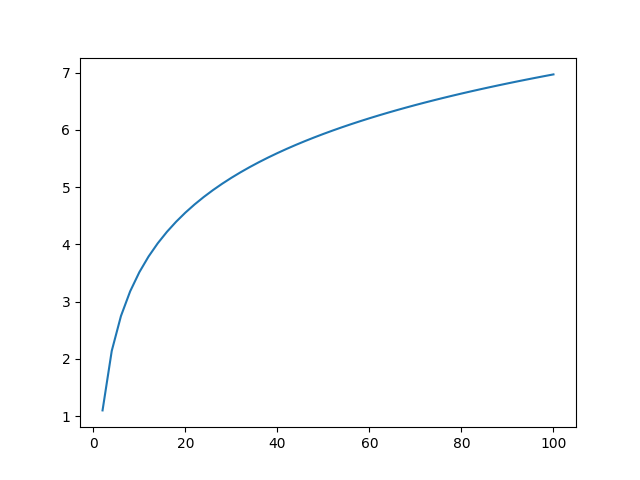

In [8]:
# I recommend using this way of initializing the plot (rather than e.g. plt.plot).
# fig and ax are objects that represent different aspects of the plot.
# Each have various methods that allow you to change the appearance of the plot.
# For the most part, we work with the ax object.
fig, ax = plt.subplots()
ax.plot(df['Time'], df['Temperature'])

## Plotting data only over a specific range

Often we have a bunch of data, but we only want to plot it over a specific range of values.  There are two ways to achieve this:
1. Mask the data to so that only the data we want is sent to the plotting functions, or
2. Use the set_xlim and set_ylim, to manually set the axis limits.

In most cases, the first method is preferable.

### Data masking example

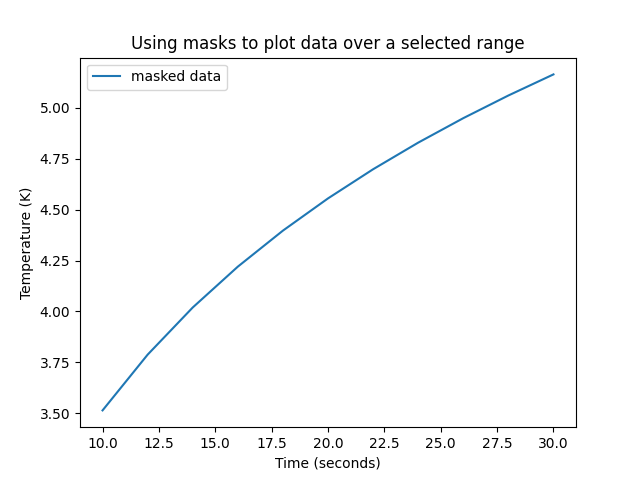

In [9]:
# First we create a "mask" that is a list of True/False values
mask = df['Time'].between(10, 30)
# The line below would do the same thing.
# mask = (10 < df['Time']) & (df['Time'] < 30)

# Now plot it
fig, ax = plt.subplots()
ax.set_title('Using masks to plot data over a selected range')
ax.plot(df['Time'][mask], df['Temperature'][mask], label='masked data')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Temperature (K)')
ax.legend()

### Manually setting axis limits

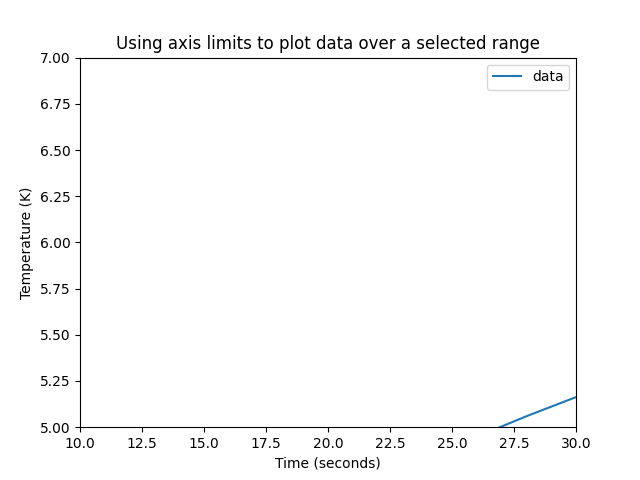

In [10]:
fig, ax = plt.subplots()
ax.set_title('Using axis limits to plot data over a selected range')
ax.plot(df['Time'], df['Temperature'], label='data')
ax.set_xlabel('Time (seconds)')
ax.set_xlim(10, 30)
ax.set_ylim(5, 7)
ax.set_ylabel('Temperature (K)')
ax.legend()

## Multi-panel plots

Text(0.5, 0, 'Time (s)')

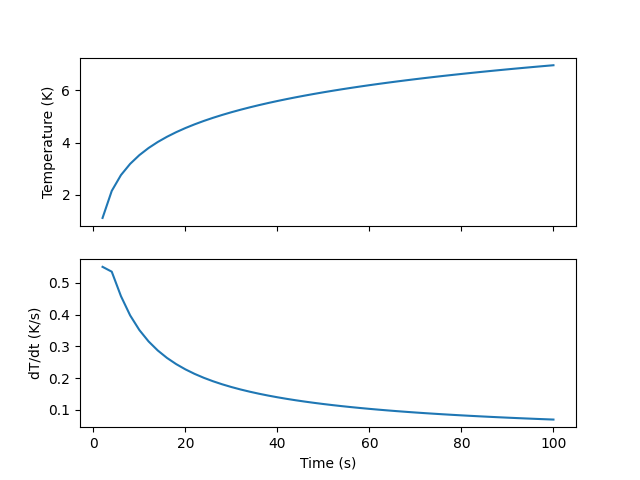

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(df['Time'], df['Temperature'])
ax[0].set_ylabel('Temperature (K)')
# Hide the x-axis tick labels for the top plot.
ax[0].axes.xaxis.set_ticklabels([])
ax[1].plot(df['Time'], df['dT/dt'])
ax[1].set_ylabel('dT/dt (K/s)')
ax[1].set_xlabel('Time (s)')

## Insets

To create an inset we must create a new "axis" object using ax.inset_axis.
The argument to ax.inset is a list, with values like:
```
ax.inset_axes([x0, y0, width, height])
```

Where the values of x0, y0, width, and height are given as fractions of the main plot.

Text(0.5, 0, 'Time (s)')

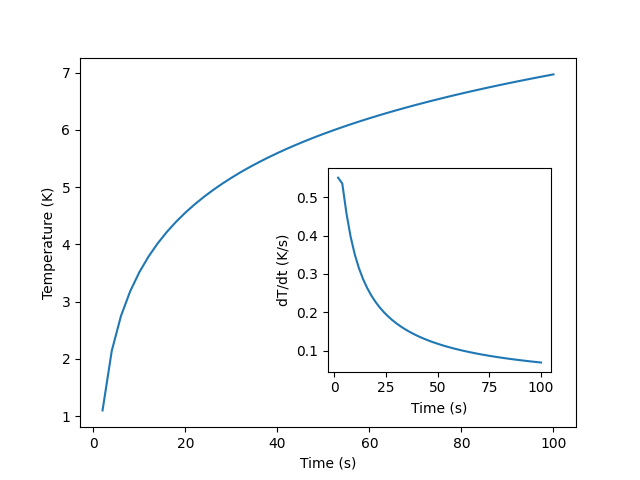

In [12]:
fig, ax = plt.subplots()
ax.plot(df['Time'], df['Temperature'])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Temperature (K)')
ax_inset = ax.inset_axes([0.5, 0.15, 0.45, 0.55])
ax_inset.plot(df['Time'], df['dT/dt'])
ax_inset.set_ylabel('dT/dt (K/s)')
ax_inset.set_xlabel('Time (s)')

## Plotting with the Hamlin Lab style template

The table below shows several templates that can be used to create plots in a consistent format.
You can override only the size setting if you require a different aspect ratio (see commented-out plt.rcParams line above).

|  Name                      | Description              |
| -------------------------- | ------------------------ |
|  hl.mplstyle.prb_regular   | Single column wide       |
|  hl.mplstyle.prb_tall      | Single column wide, tall |
|  hl.mplstyle.prb_wide      | 1.5 column wide          |
|  hl.mplstyle.prb_extrawide | 2 column wide            |


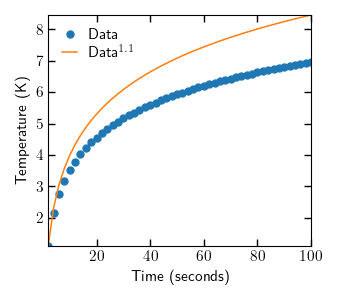

In [13]:
# An example of a plot
# The 'with' statement restricts the effects of style application
# to the indented text.  Confusing effects can arise if you don't do this.
with plt.style.context(hl.mplstyle.prb_regular):
    # Uncomment the line below to customize the figure size.
    # plt.rcParams["figure.figsize"] = (3.375, 2)
    fig, ax = plt.subplots()
    # The 'o' specifies dots instead of a line.
    ax.plot(df['Time'], df['Temperature'], 'o', label='Data')
    # Note use of latex mathmode in label.
    ax.plot(df['Time'], df['Temperature']**1.1, label='Data$^{1.1}$')
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Temperature (K)')
    ax.legend()

    # Note the use of pub_ready_dir to reference the folder to save to.
    # hamlinlab.config specifies the locations of the various folders to read and write to.
    # Uncomment line below to save the plot to a pdf file
    plt.savefig(hamlinlab_template.pub_ready_dir / 'example_figure_01.pdf')

# Curve fitting

There are various ways to do curve fitting in python.  Here I show how to use the curve_fit function from scipy.optimize.
Note the  
```
from scipy.optimize import curve_fit
```
instruction at the top of this notebook.

First we need to define the function that we are going to be fitting to:

In [14]:
'''
The lambda thing is initially confusing, but it's just a way of
Quickly defining a function.
x, A, and B are the arguments.  To use curve_fit, we need to make
sure that x is the first argument.

Instead of the lambda notation below, we could just as well have said:
def f(x, A, B):
    return A * np.log(B * x)

'''

f = lambda x, A, B: A * np.log(B * x)

# popt is the optimized fit parameters.
# pcov is the covarience matrix.
popt, pcov = curve_fit(f, df['Time'], df['Temperature'])
print(f'{popt = }')

popt = array([1.5       , 1.04150849])


In [15]:
# It's a little inconvenient, but curve_fit does not output the uncertainty
# in the fit parameters.  So we need to calculate them ourselves from the covariance
# matrix.  The diagonal elements of the covariance matrix are the variances.  And
# the sqrt of the variance is the std deviation.

uncertainties = np.sqrt(np.diag(pcov))
print(uncertainties)

[1.51092749e-16 3.99342734e-16]


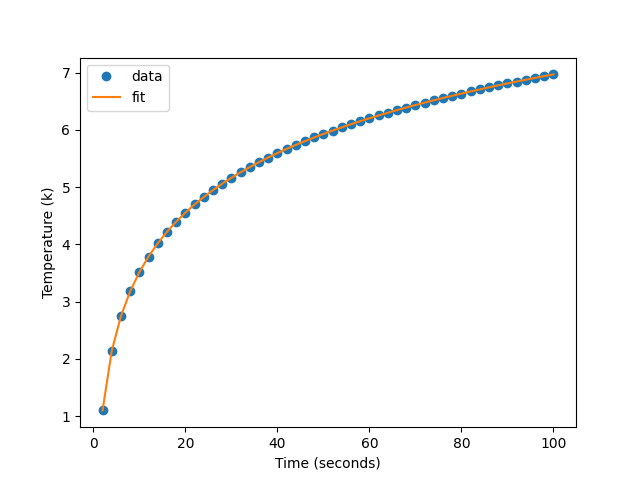

In [16]:
fig, ax = plt.subplots()
ax.plot(df['Time'], df['Temperature'], 'o', label='data')
ax.plot(df['Time'], f(df['Time'], *popt), label='fit')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Temperature (k)')
ax.legend()

In [17]:
# Lambda functions offer a concise way to modify the fitting processes to keep
# One or more of the fit parameters fixed.

# Here we make a new function f2 that is identical to f, except that it
# keeps B fixed at 1.0.
f2 = lambda x, A: f(x, A, 1.0)
popt2, pcov2 = curve_fit(f2, df['Time'], df['Temperature'])
print(f'{popt2 = }')
uncertainties = np.sqrt(np.diag(pcov2))
print(f'{uncertainties = }')

popt2 = array([1.51574637])
uncertainties = array([0.0005406])


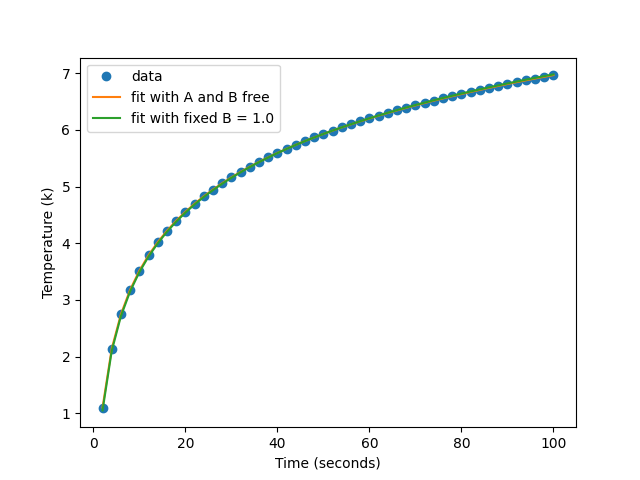

In [18]:
fig, ax = plt.subplots()
ax.plot(df['Time'], df['Temperature'], 'o', label='data')
ax.plot(df['Time'], f(df['Time'], *popt), label='fit with A and B free')
ax.plot(df['Time'], f2(df['Time'], *popt2), label='fit with fixed B = 1.0')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Temperature (k)')
ax.legend()